# ebay products - price analysis and prediction

## Import dataset from database

In [1]:
import pymysql.cursors

connection = pymysql.connect(host='localhost',
                             user='root',
                             password='royY1987',
                             database='ebay_products',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)

In [2]:
import pandas as pd
query = """SELECT * FROM products as p LEFT JOIN categories as ct ON p.category_id = ct.category_id 
LEFT JOIN conditions as cd ON p.condition_id = cd.condition_id LEFT JOIN sellers as s ON p.seller_id = s.seller_id 
LEFT JOIN countries as co ON p.country_id = co.country_id"""

ebay_products = pd.read_sql(query, connection)

In [3]:
connection.close()

## Exploring the dataset

In [4]:
ebay_products.head()

,product_id,seller_id,category_id,country_id,condition_id,product_name,product_price,shipping_fee,page_number,category_id,category,condition_id,product_condition,seller_id,seller_name,seller_feedback_score,country_id,origin_country
0,1,1,1,1,1,Apple iPhone 12 Pro Max - 256gb - Unlocked - F...,4341.26,157.58,1,1,Cell Phones & Accessories,1,New,1,alldayzip,32390,1,United States
1,2,2,1,1,2,Apple iPhone 12 Mini Smartphone 64 128 256GB A...,1834.76,106.84,1,1,Cell Phones & Accessories,2,Seller refurbished,2,supplytronics,69441,1,United States
2,3,3,1,1,1,Apple iPhone 12 - 64GB / 128GB (UNLOCKED) Fac...,2853.90,125.29,1,1,Cell Phones & Accessories,1,New,3,santamonicawireless,22198,1,United States
3,4,1,1,1,1,Apple iPhone 12 Mini - 128gb - Unlocked - Fact...,2703.68,118.44,1,1,Cell Phones & Accessories,1,New,1,alldayzip,32390,1,United States
4,5,5,1,5,1,Apple iPhone 12 Pro Max - 128GB - Pacific Blue,2282.42,23.05,1,1,Cell Phones & Accessories,1,New,5,teall_37,0,5,Ukraine


In [5]:
ebay_products.shape

(8340, 18)

In [6]:
ebay_products.to_csv('raw_data.csv', index=False)

### Remove unnecessary columns

In [7]:
ebay_products.drop(['product_id', 'seller_id', 'category_id', 'seller_name', 'country_id', 'condition_id'], axis=1, inplace=True)

### Leave products from relevant categories only

In [8]:
categories = ['Cell Phones & Accessories', 'Computers/Tablets & Networking']
ebay_products = ebay_products[ebay_products['category'].isin(categories)]

In [9]:
ebay_products.shape

(8267, 8)

In [10]:
ebay_products.head()

,product_name,product_price,shipping_fee,page_number,category,product_condition,seller_feedback_score,origin_country
0,Apple iPhone 12 Pro Max - 256gb - Unlocked - F...,4341.26,157.58,1,Cell Phones & Accessories,New,32390,United States
1,Apple iPhone 12 Mini Smartphone 64 128 256GB A...,1834.76,106.84,1,Cell Phones & Accessories,Seller refurbished,69441,United States
2,Apple iPhone 12 - 64GB / 128GB (UNLOCKED) Fac...,2853.90,125.29,1,Cell Phones & Accessories,New,22198,United States
3,Apple iPhone 12 Mini - 128gb - Unlocked - Fact...,2703.68,118.44,1,Cell Phones & Accessories,New,32390,United States
4,Apple iPhone 12 Pro Max - 128GB - Pacific Blue,2282.42,23.05,1,Cell Phones & Accessories,New,0,Ukraine


### Check for and deal with NAs

In [11]:
import numpy as np
ebay_products = ebay_products.replace('NULL', np.nan)

In [12]:
ebay_products.isna().sum()

product_name               0
product_price              0
shipping_fee             404
page_number                0
category                   0
product_condition          0
seller_feedback_score      0
origin_country             1
dtype: int64

In [13]:
ebay_products.dropna(inplace=True)

In [14]:
ebay_products.shape

(7863, 8)

In [15]:
ebay_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7863 entries, 0 to 8339
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_name           7863 non-null   object 
 1   product_price          7863 non-null   float64
 2   shipping_fee           7863 non-null   float64
 3   page_number            7863 non-null   int64  
 4   category               7863 non-null   object 
 5   product_condition      7863 non-null   object 
 6   seller_feedback_score  7863 non-null   int64  
 7   origin_country         7863 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 552.9+ KB


## Change ebay titles to uniform product names

In [16]:
ebay_products.loc[ebay_products['product_name'].str.contains("iphone 12"), 'product_name'] = 'iphone 12'

ebay_products.loc[ebay_products['product_name'].str.contains("iPhone 12"), 'product_name'] = 'iphone 12'

ebay_products.loc[ebay_products['product_name'].str.contains("IPHONE 12"), 'product_name'] = 'iphone 12'

ebay_products.loc[ebay_products['product_name'].str.contains("iphone 11"), 'product_name'] = 'iphone 11'

ebay_products.loc[ebay_products['product_name'].str.contains("iPhone 11"), 'product_name'] = 'iphone 11'

ebay_products.loc[ebay_products['product_name'].str.contains("IPHONE 11"), 'product_name'] = 'iphone 11'

ebay_products.loc[ebay_products['product_name'].str.contains("iphone x"), 'product_name'] = 'iphone x'

ebay_products.loc[ebay_products['product_name'].str.contains("iphone X"), 'product_name'] = 'iphone x'

ebay_products.loc[ebay_products['product_name'].str.contains("iPhone x"), 'product_name'] = 'iphone x'

ebay_products.loc[ebay_products['product_name'].str.contains("IPHONE X"), 'product_name'] = 'iphone x'

ebay_products.loc[ebay_products['product_name'].str.contains("iPhone X"), 'product_name'] = 'iphone x'

ebay_products.loc[ebay_products['product_name'].str.contains("galaxy s20"), 'product_name'] = 'galaxy s20'

ebay_products.loc[ebay_products['product_name'].str.contains("Galaxy S20"), 'product_name'] = 'galaxy s20'

ebay_products.loc[ebay_products['product_name'].str.contains("GALAXY S20"), 'product_name'] = 'galaxy s20'

ebay_products.loc[ebay_products['product_name'].str.contains("Galaxy s21"), 'product_name'] = 'galaxy s21'

ebay_products.loc[ebay_products['product_name'].str.contains("galaxy s21"), 'product_name'] = 'galaxy s21'

ebay_products.loc[ebay_products['product_name'].str.contains("galaxy S21"), 'product_name'] = 'galaxy s21'

ebay_products.loc[ebay_products['product_name'].str.contains("Galaxy S21"), 'product_name'] = 'galaxy s21'

ebay_products.loc[ebay_products['product_name'].str.contains("GALAXY S21"), 'product_name'] = 'galaxy s21'

ebay_products.loc[ebay_products['product_name'].str.contains("galaxy s10"), 'product_name'] = 'galaxy s10'

ebay_products.loc[ebay_products['product_name'].str.contains("Galaxy S10"), 'product_name'] = 'galaxy s10'

ebay_products.loc[ebay_products['product_name'].str.contains("GALAXY S10"), 'product_name'] = 'galaxy s10'

ebay_products.loc[ebay_products['product_name'].str.contains("Huawei P30"), 'product_name'] = 'huawei p30'

ebay_products.loc[ebay_products['product_name'].str.contains("Huawei p30"), 'product_name'] = 'huawei p30'

ebay_products.loc[ebay_products['product_name'].str.contains("huawei p30"), 'product_name'] = 'huawei p30'

ebay_products.loc[ebay_products['product_name'].str.contains("HUAWEI P30"), 'product_name'] = 'huawei p30'

ebay_products.loc[ebay_products['product_name'].str.contains("Huawei P40"), 'product_name'] = 'huawei p40'

ebay_products.loc[ebay_products['product_name'].str.contains("Huawei p40"), 'product_name'] = 'huawei p40'

ebay_products.loc[ebay_products['product_name'].str.contains("Huawei p40"), 'product_name'] = 'huawei p40'

ebay_products.loc[ebay_products['product_name'].str.contains("HUAWEI P40"), 'product_name'] = 'huawei p40'

ebay_products.loc[ebay_products['product_name'].str.contains("Macbook Air"), 'product_name'] = 'macbook air'

ebay_products.loc[ebay_products['product_name'].str.contains("macbook air"), 'product_name'] = 'macbook air'

ebay_products.loc[ebay_products['product_name'].str.contains("Macbook air"), 'product_name'] = 'macbook air'

ebay_products.loc[ebay_products['product_name'].str.contains("MacBook Air"), 'product_name'] = 'macbook air'

ebay_products.loc[ebay_products['product_name'].str.contains("MACBOOK AIR"), 'product_name'] = 'macbook air'

ebay_products.loc[ebay_products['product_name'].str.contains("macbook pro"), 'product_name'] = 'macbook pro'

ebay_products.loc[ebay_products['product_name'].str.contains("Macbook pro"), 'product_name'] = 'macbook pro'

ebay_products.loc[ebay_products['product_name'].str.contains("Macbook Pro"), 'product_name'] = 'macbook pro'

ebay_products.loc[ebay_products['product_name'].str.contains("MacBook Pro"), 'product_name'] = 'macbook pro'

ebay_products.loc[ebay_products['product_name'].str.contains("MACBOOK PRO"), 'product_name'] = 'macbook pro'

ebay_products.loc[ebay_products['product_name'].str.contains("Asus ZenBook"), 'product_name'] = 'asus zenbook'

ebay_products.loc[ebay_products['product_name'].str.contains("ZenBook"), 'product_name'] = 'asus zenbook'

ebay_products.loc[ebay_products['product_name'].str.contains("Zenbook"), 'product_name'] = 'asus zenbook'

ebay_products.loc[ebay_products['product_name'].str.contains("ZENBOOK"), 'product_name'] = 'asus zenbook'

ebay_products.loc[ebay_products['product_name'].str.contains("galaxy book"), 'product_name'] = 'galaxy book'

ebay_products.loc[ebay_products['product_name'].str.contains("Galaxy book"), 'product_name'] = 'galaxy book'

ebay_products.loc[ebay_products['product_name'].str.contains("Galaxy Book"), 'product_name'] = 'galaxy book'

ebay_products.loc[ebay_products['product_name'].str.contains("GalaxyBook"), 'product_name'] = 'galaxy book'

ebay_products.loc[ebay_products['product_name'].str.contains("GALAXYBOOK"), 'product_name'] = 'galaxy book'

ebay_products.loc[ebay_products['product_name'].str.contains("galaxybook"), 'product_name'] = 'galaxy book'

ebay_products.loc[ebay_products['product_name'].str.contains("GALAXY BOOK"), 'product_name'] = 'galaxy book'

ebay_products.loc[ebay_products['product_name'].str.contains("Vivobook"), 'product_name'] = 'asus vivobook'

ebay_products.loc[ebay_products['product_name'].str.contains("VivoBook"), 'product_name'] = 'asus vivobook'

ebay_products.loc[ebay_products['product_name'].str.contains("VIVOBOOK"), 'product_name'] = 'asus vivobook'

ebay_products.loc[ebay_products['product_name'].str.contains("thinkpad"), 'product_name'] = 'lenovo thinkpad'

ebay_products.loc[ebay_products['product_name'].str.contains("Thinkpad"), 'product_name'] = 'lenovo thinkpad'

ebay_products.loc[ebay_products['product_name'].str.contains("ThinkPad"), 'product_name'] = 'lenovo thinkpad'

ebay_products.loc[ebay_products['product_name'].str.contains("THINKPAD"), 'product_name'] = 'lenovo thinkpad'

ebay_products.loc[ebay_products['product_name'].str.contains("ideapad"), 'product_name'] = 'lenovo ideapad'

ebay_products.loc[ebay_products['product_name'].str.contains("Ideapad"), 'product_name'] = 'lenovo ideapad'

ebay_products.loc[ebay_products['product_name'].str.contains("IdeaPad"), 'product_name'] = 'lenovo ideapad'

ebay_products.loc[ebay_products['product_name'].str.contains("IDEAPAD"), 'product_name'] = 'lenovo ideapad'

ebay_products.loc[ebay_products['product_name'].str.contains("thinkbook"), 'product_name'] = 'lenovo thinkbook'

ebay_products.loc[ebay_products['product_name'].str.contains("ThinkBook"), 'product_name'] = 'lenovo thinkbook'

ebay_products.loc[ebay_products['product_name'].str.contains("Thinkbook"), 'product_name'] = 'lenovo thinkbook'

ebay_products.loc[ebay_products['product_name'].str.contains("THINKBOOK"), 'product_name'] = 'lenovo thinkbook'

ebay_products.loc[ebay_products['product_name'].str.contains("latitude"), 'product_name'] = 'dell latitude'

ebay_products.loc[ebay_products['product_name'].str.contains("Latitude"), 'product_name'] = 'dell latitude'

ebay_products.loc[ebay_products['product_name'].str.contains("LATITUDE"), 'product_name'] = 'dell latitude'

ebay_products.loc[ebay_products['product_name'].str.contains("Redmibook"), 'product_name'] = 'xiaomi redmibook'

ebay_products.loc[ebay_products['product_name'].str.contains("RedmiBook"), 'product_name'] = 'xiaomi redmibook'

ebay_products.loc[ebay_products['product_name'].str.contains("REDMIBOOK"), 'product_name'] = 'xiaomi redmibook'

ebay_products.loc[ebay_products['product_name'].str.contains("matebook"), 'product_name'] = 'huawei matebook'

ebay_products.loc[ebay_products['product_name'].str.contains("Matebook"), 'product_name'] = 'huawei matebook'

ebay_products.loc[ebay_products['product_name'].str.contains("MateBook"), 'product_name'] = 'huawei matebook'

ebay_products.loc[ebay_products['product_name'].str.contains("MATEBOOK"), 'product_name'] = 'huawei matebook'

ebay_products.loc[ebay_products['product_name'].str.contains("Mi 10"), 'product_name'] = 'xiaomi mi 10'

ebay_products.loc[ebay_products['product_name'].str.contains("mi 10"), 'product_name'] = 'xiaomi mi 10'

ebay_products.loc[ebay_products['product_name'].str.contains("MI 10"), 'product_name'] = 'xiaomi mi 10'

ebay_products.loc[ebay_products['product_name'].str.contains("mi 11"), 'product_name'] = 'xiaomi mi 11'

ebay_products.loc[ebay_products['product_name'].str.contains("Mi 11"), 'product_name'] = 'xiaomi mi 11'

ebay_products.loc[ebay_products['product_name'].str.contains("MI 11"), 'product_name'] = 'xiaomi mi 11'

ebay_products.loc[ebay_products['product_name'].str.contains("ipad air"), 'product_name'] = 'ipad air'

ebay_products.loc[ebay_products['product_name'].str.contains("iPad Air"), 'product_name'] = 'ipad air'

ebay_products.loc[ebay_products['product_name'].str.contains("IPAD AIR"), 'product_name'] = 'ipad air'

ebay_products.loc[ebay_products['product_name'].str.contains("iPad Pro"), 'product_name'] = 'ipad pro'

ebay_products.loc[ebay_products['product_name'].str.contains("IPAD PRO"), 'product_name'] = 'ipad pro'

ebay_products.loc[ebay_products['product_name'].str.contains("galaxy tab"), 'product_name'] = 'galaxy tab'

ebay_products.loc[ebay_products['product_name'].str.contains("Galaxy Tab"), 'product_name'] = 'galaxy tab'

ebay_products.loc[ebay_products['product_name'].str.contains("GALAXY TAB"), 'product_name'] = 'galaxy tab'

ebay_products.loc[ebay_products['product_name'].str.contains("lenovo tab"), 'product_name'] = 'lenovo tab'

ebay_products.loc[ebay_products['product_name'].str.contains("Lenovo tab"), 'product_name'] = 'lenovo tab'

ebay_products.loc[ebay_products['product_name'].str.contains("Lenovo Tab"), 'product_name'] = 'lenovo tab'

ebay_products.loc[ebay_products['product_name'].str.contains("LENOVO TAB"), 'product_name'] = 'lenovo tab'

ebay_products.loc[ebay_products['product_name'].str.contains("Mediapad"), 'product_name'] = 'huawei mediapad'

ebay_products.loc[ebay_products['product_name'].str.contains("MediaPad"), 'product_name'] = 'huawei mediapad'

ebay_products.loc[ebay_products['product_name'].str.contains("Media Pad"), 'product_name'] = 'huawei mediapad'

ebay_products.loc[ebay_products['product_name'].str.contains("MEDIA PAD"), 'product_name'] = 'huawei mediapad'

ebay_products.loc[ebay_products['product_name'].str.contains("dell vostro"), 'product_name'] = 'dell vostro'

ebay_products.loc[ebay_products['product_name'].str.contains("Dell Vostro"), 'product_name'] = 'dell vostro'

ebay_products.loc[ebay_products['product_name'].str.contains("DELL VOSTRO"), 'product_name'] = 'dell vostro'

ebay_products.loc[ebay_products['product_name'].str.contains("oneplus nord"), 'product_name'] = 'oneplus nord'

ebay_products.loc[ebay_products['product_name'].str.contains("OnePlus Nord"), 'product_name'] = 'oneplus nord'

ebay_products.loc[ebay_products['product_name'].str.contains("ONEPLUS NORD"), 'product_name'] = 'oneplus nord'

ebay_products.loc[ebay_products['product_name'].str.contains("oneplus 8 pro"), 'product_name'] = 'oneplus 8 pro'

ebay_products.loc[ebay_products['product_name'].str.contains("oneplus 8"), 'product_name'] = 'oneplus 8 pro'

ebay_products.loc[ebay_products['product_name'].str.contains("OnePlus 8 Pro"), 'product_name'] = 'oneplus 8  pro'

ebay_products.loc[ebay_products['product_name'].str.contains("ONEPLUS 8 PRO"), 'product_name'] = 'oneplus 8  pro'

ebay_products.loc[ebay_products['product_name'].str.contains("OnePlus 8 pro"), 'product_name'] = 'oneplus 8  pro'

ebay_products.loc[ebay_products['product_name'].str.contains("OnePlus 8"), 'product_name'] = 'oneplus 8 pro'

ebay_products.loc[ebay_products['product_name'].str.contains("ONEPLUS 8"), 'product_name'] = 'oneplus 8 pro'

ebay_products.loc[ebay_products['product_name'].str.contains("/ 8 Pro"), 'product_name'] = 'oneplus 8 pro'

ebay_products.loc[ebay_products['product_name'].str.contains("Oneplus 8 Pro"), 'product_name'] = 'oneplus 8 pro'

ebay_products.loc[ebay_products['product_name'].str.contains("strix scar"), 'product_name'] = 'asus rog strix scar'

ebay_products.loc[ebay_products['product_name'].str.contains("Strix Scar"), 'product_name'] = 'asus rog strix scar'

ebay_products.loc[ebay_products['product_name'].str.contains("STRIX SCAR"), 'product_name'] = 'asus rog strix scar'

ebay_products.loc[ebay_products['product_name'].str.contains("Strix"), 'product_name'] = 'asus rog strix scar'

ebay_products.loc[ebay_products['product_name'].str.contains("STRIX"), 'product_name'] = 'asus rog strix scar'

ebay_products.loc[ebay_products['product_name'].str.contains("Oneplus Nord"), 'product_name'] = 'oneplus nord'

ebay_products.loc[ebay_products['product_name'].str.contains("OnePlus NORD"), 'product_name'] = 'oneplus nord'

ebay_products.loc[ebay_products['product_name'].str.contains("dell xps"), 'product_name'] = 'dell xps'

ebay_products.loc[ebay_products['product_name'].str.contains("Dell xps"), 'product_name'] = 'dell xps'

ebay_products.loc[ebay_products['product_name'].str.contains("Dell XPS"), 'product_name'] = 'dell xps'

ebay_products.loc[ebay_products['product_name'].str.contains("DELL XPS"), 'product_name'] = 'dell xps'

ebay_products.loc[ebay_products['product_name'].str.contains("zephyrus"), 'product_name'] = 'asus zephyrus'

ebay_products.loc[ebay_products['product_name'].str.contains("Zephyrus"), 'product_name'] = 'asus zephyrus'

ebay_products.loc[ebay_products['product_name'].str.contains("ZEPHYRUS"), 'product_name'] = 'asus zephyrus'

ebay_products.loc[ebay_products['product_name'].str.contains("dell precision"), 'product_name'] = 'dell precision'

ebay_products.loc[ebay_products['product_name'].str.contains("Dell Precision"), 'product_name'] = 'dell precision'

ebay_products.loc[ebay_products['product_name'].str.contains("DELL PRECISION"), 'product_name'] = 'dell precision'

ebay_products.loc[ebay_products['product_name'].str.contains("hp zbook"), 'product_name'] = 'hp zbook'

ebay_products.loc[ebay_products['product_name'].str.contains("HP Zbook"), 'product_name'] = 'hp zbook'

ebay_products.loc[ebay_products['product_name'].str.contains("HP ZBook"), 'product_name'] = 'hp zbook'

ebay_products.loc[ebay_products['product_name'].str.contains("HP ZBOOK"), 'product_name'] = 'hp zbook'

ebay_products.loc[ebay_products['product_name'].str.contains("hp Zbook"), 'product_name'] = 'hp zbook'

ebay_products.loc[ebay_products['product_name'].str.contains("hp ZBook"), 'product_name'] = 'hp zbook'

ebay_products.loc[ebay_products['product_name'].str.contains("gigabyte"), 'product_name'] = 'gigabyte aero'

ebay_products.loc[ebay_products['product_name'].str.contains("Gigabyte"), 'product_name'] = 'gigabyte aero'

ebay_products.loc[ebay_products['product_name'].str.contains("GIGABYTE"), 'product_name'] = 'gigabyte aero'

## Filter unidentified products

In [17]:
models = ['huawei mediapad', 'lenovo tab', 'galaxy tab', 'ipad pro', 'ipad air', 'iphone x', 'xiaomi mi 11', 'xiaomi mi 10', 'galaxy s10', 'huawei matebook', 'xiaomi redmibook', 'dell latitude', 'lenovo thinkbook', 'lenovo ideapad', 'lenovo thinkpad', 'asus vivobook', 'galaxy book', 'asus zenbook', 'macbook pro', 'macbook air', 'huawei p40', 'huawei p30', 'galaxy s21', 'galaxy s20', 'iphone 11', 'iphone 12', 'dell vostro', 'oneplus nord', 'oneplus 8 pro', 'dell xps', 'asus zephyrus', 'dell precision', 'hp zbook', 'asus rog strix scar', 'gigabyte aero', 'realme 7']


In [18]:
ebay_products2 = ebay_products[ebay_products['product_name'].isin(models)]

In [19]:
ebay_products2.shape

(6476, 8)

## Create a new feature - 'Manufacturer' (manufacturing company)

In [20]:
manufacturer = []
models = np.array(['huawei mediapad', 'lenovo tab', 'galaxy tab', 'ipad pro', 'ipad air', 'iphone x', 'xiaomi mi 11', 'xiaomi mi 10', 'galaxy s10', 'huawei matebook', 'xiaomi redmibook', 'dell latitude', 'lenovo thinkbook', 'lenovo ideapad', 'lenovo thinkpad', 'asus vivobook', 'galaxy book', 'asus zenbook', 'macbook pro', 'macbook air', 'huawei p40', 'huawei p30', 'galaxy s21', 'galaxy s20', 'iphone 11', 'iphone 12', 'dell vostro', 'oneplus nord', 'oneplus 8 pro', 'dell xps', 'asus zephyrus', 'dell precision', 'hp zbook', 'asus rog strix scar', 'gigabyte aero', 'realme 7'])
manufact = np.array(['huawei', 'lenovo', 'samsung', 'apple', 'apple', 'apple', 'xiaomi', 'xiaomi', 'samsung', 'huawei', 'xiaomi', 'dell', 'lenovo', 'lenovo', 'lenovo', 'asus', 'samsung', 'asus', 'apple', 'apple', 'huawei', 'huawei', 'samsung', 'samsung', 'apple', 'apple', 'dell', 'oneplus', 'oneplus', 'dell', 'asus', 'dell', 'hp', 'asus', 'gigabyte', 'realme'])

for prod in ebay_products2.loc[:,'product_name']:
    prod_loc = np.argwhere(models==prod)
    m = np.take(manufact, prod_loc[0][0])
    manufacturer.append(m)
ebay_products2['manufacturer'] = manufacturer

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


## Change the category feature so it will be splitted into 3: Smartphones, Tablets, and Computers

In [21]:
ebay_products2.drop(['category'], axis=1, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [22]:
new_cats = np.array(['Tablets', 'Tablets', 'Tablets', 'Tablets', 'Tablets', 'Smartphones', 'Smartphones', 'Smartphones', 'Smartphones', 'Computers', 'Computers', 'Tablets', 'Computers', 'Computers', 'Computers', 'Computers', 'Computers', 'Computers', 'Computers', 'Computers', 'Smartphones', 'Smartphones', 'Smartphones', 'Smartphones', 'Smartphones', 'Smartphones', 'Computers', 'Smartphones', 'Smartphones', 'Computers', 'Computers', 'Computers', 'Computers', 'Computers', 'Computers', 'Smartphones'])

cats = []
for prod in ebay_products2.loc[:,'product_name']:
    prod_loc = np.argwhere(models==prod)
    ca = np.take(new_cats, prod_loc[0][0])
    cats.append(ca)
ebay_products2['category'] = cats


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
ebay_products2['category'].value_counts()

Computers      2845
Smartphones    2524
Tablets        1107
Name: category, dtype: int64

In [24]:
ebay_products2['manufacturer'].value_counts()

apple       1644
samsung     1060
lenovo       878
huawei       757
dell         741
asus         608
xiaomi       403
oneplus      237
hp           108
gigabyte      40
Name: manufacturer, dtype: int64

In [25]:
ebay_products2.head()

,product_name,product_price,shipping_fee,page_number,product_condition,seller_feedback_score,origin_country,manufacturer,category
0,iphone 12,4341.26,157.58,1,New,32390,United States,apple,Smartphones
1,iphone 12,1834.76,106.84,1,Seller refurbished,69441,United States,apple,Smartphones
2,iphone 12,2853.90,125.29,1,New,22198,United States,apple,Smartphones
3,iphone 12,2703.68,118.44,1,New,32390,United States,apple,Smartphones
4,iphone 12,2282.42,23.05,1,New,0,Ukraine,apple,Smartphones


In [26]:
ebay_products2['product_name'].value_counts()

lenovo thinkpad        340
galaxy s20             318
iphone 12              273
galaxy s10             247
iphone 11              240
macbook pro            239
huawei p40             236
huawei p30             232
asus zenbook           230
dell xps               229
ipad air               226
iphone x               225
ipad pro               221
macbook air            220
galaxy tab             215
dell precision         211
lenovo ideapad         209
xiaomi mi 10           201
asus vivobook          196
galaxy s21             196
lenovo thinkbook       187
huawei mediapad        171
dell vostro            169
oneplus nord           161
lenovo tab             142
dell latitude          132
xiaomi mi 11           119
huawei matebook        118
hp zbook               108
asus zephyrus           93
asus rog strix scar     89
galaxy book             84
xiaomi redmibook        83
oneplus 8 pro           76
gigabyte aero           40
Name: product_name, dtype: int64

## Split to train and test sets

In [27]:
X = ebay_products2.drop(['product_price'], axis=1)
y = ebay_products2['product_price']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Examining the distribution of the target variable

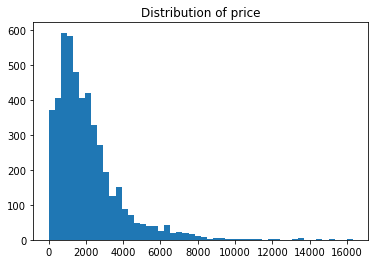

In [29]:
import matplotlib.pyplot as plt

plt.hist(y_train, bins=50)
plt.title(f'Distribution of price')
plt.show()

In [30]:
train_set = pd.concat([X_train, y_train], axis=1)
test_set = pd.concat([X_test, y_test], axis=1)

## Saving the train and test sets as csv files

In [31]:
train_set.to_csv('train_set.csv', index=False)
test_set.to_csv('test_set.csv', index=False)

### Filtering outliers with extreme values

In [32]:
train_set = train_set[(train_set['product_price'] >= 150) & (train_set['product_price'] < 12000)]
test_set = test_set[(test_set['product_price'] >= 150) & (test_set['product_price'] < 12000)]

In [33]:
train_set.shape

(4649, 9)

In [34]:
test_set.shape

(1545, 9)

## Examining seller feedback scores revealed must values are zeros, so it was dropped

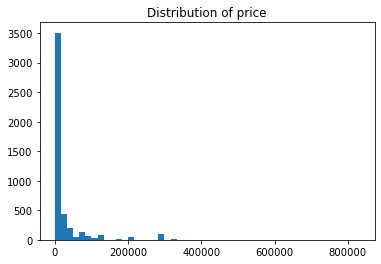

In [35]:
plt.hist(train_set['seller_feedback_score'], bins=50)
plt.title(f'Distribution of price')
plt.show()

In [36]:
train_set.drop(['seller_feedback_score'], axis=1, inplace=True)
test_set.drop(['seller_feedback_score'], axis=1, inplace=True)

In [37]:
train_set.shape

(4649, 8)

In [38]:
test_set.shape

(1545, 8)

## Dealing with sparsity in the country feature

In [39]:
train_set['origin_country'].value_counts()

United States                                                                 2413
United Kingdom                                                                1556
Germany                                                                        134
China                                                                          105
Hong Kong                                                                       80
South                                                                           63
Philippines                                                                     51
France                                                                          41
Australia                                                                       34
Italy                                                                           33
Spain                                                                           21
Canada                                                                          17
Ukra

In [40]:
s = train_set['origin_country'].value_counts()
train_set['origin_country'] = np.where(train_set['origin_country'].isin(s.index[s < 40]), 'Others', train_set['origin_country'])

In [41]:
test_set['origin_country'] = np.where(test_set['origin_country'].isin(s.index[s < 40]), 'Others', test_set['origin_country'])

In [42]:
train_set['origin_country'].value_counts()

United States     2413
United Kingdom    1556
Others             206
Germany            134
China              105
Hong Kong           80
South               63
Philippines         51
France              41
Name: origin_country, dtype: int64

## Data analysis and plotting

In [43]:
df = ebay_products2[(ebay_products2['product_price'] >= 150) & (ebay_products2['product_price'] < 12000)]

In [44]:
df = df[df['shipping_fee'] < 1200]

In [45]:
df = df.sort_values(by=['product_price']).reset_index(drop=True)

In [46]:
df = df.groupby("origin_country").filter(lambda x: len(x) > 1)

In [47]:
df

,product_name,product_price,shipping_fee,page_number,product_condition,seller_feedback_score,origin_country,manufacturer,category
0,huawei mediapad,151.68,73.61,1,Used,1017,Lithuania,huawei,Tablets
1,ipad air,151.91,133.96,2,Used,943,United Kingdom,apple,Tablets
2,huawei mediapad,152.70,90.04,3,New,1561,China,huawei,Tablets
3,hp zbook,153.02,231.29,1,For parts or not working,5446,United Kingdom,hp,Computers
4,dell latitude,153.21,319.65,3,Used,2676,United States,dell,Tablets
...,...,...,...,...,...,...,...,...,...
6188,hp zbook,10869.47,230.94,1,New,16243,Germany,hp,Computers
6189,hp zbook,10869.47,230.94,4,New,16243,Germany,hp,Computers
6190,asus rog strix scar,11170.87,281.83,1,New,16243,Germany,asus,Computers
6191,gigabyte aero,11243.77,266.32,1,New,16243,Germany,gigabyte,Computers


In [48]:
df.loc[df['origin_country'] == 'South', 'origin_country'] = 'South Africa'

In [49]:
df.loc[df['origin_country'] == 'Republic of', 'origin_country'] = 'Republic of Korea'

### Product name vs. price

In [50]:
order_list2 = ['gigabyte aero','asus zephyrus','hp zbook', 'asus rog strix scar', 'galaxy book', 'asus zenbook', 
               'xiaomi mi 11', 'lenovo thinkbook', 'huawei matebook', 'dell xps', 'galaxy s21', 'iphone 12', 
               'dell precision', 'xiaomi redmibook', 'iphone 11', 'xiaomi mi 10', 'huawei p40', 'asus vivobook', 'galaxy s20', 
               'macbook pro', 'lenovo ideapad', 'ipad pro', 'macbook air', 'dell vostro', 'oneplus 8 pro', 'oneplus nord', 
               'huawei p30', 'lenovo thinkpad', 'galaxy s10', 'iphone x', 'dell latitude', 'galaxy tab', 'ipad air', 'lenovo tab', 
               'huawei mediapad']

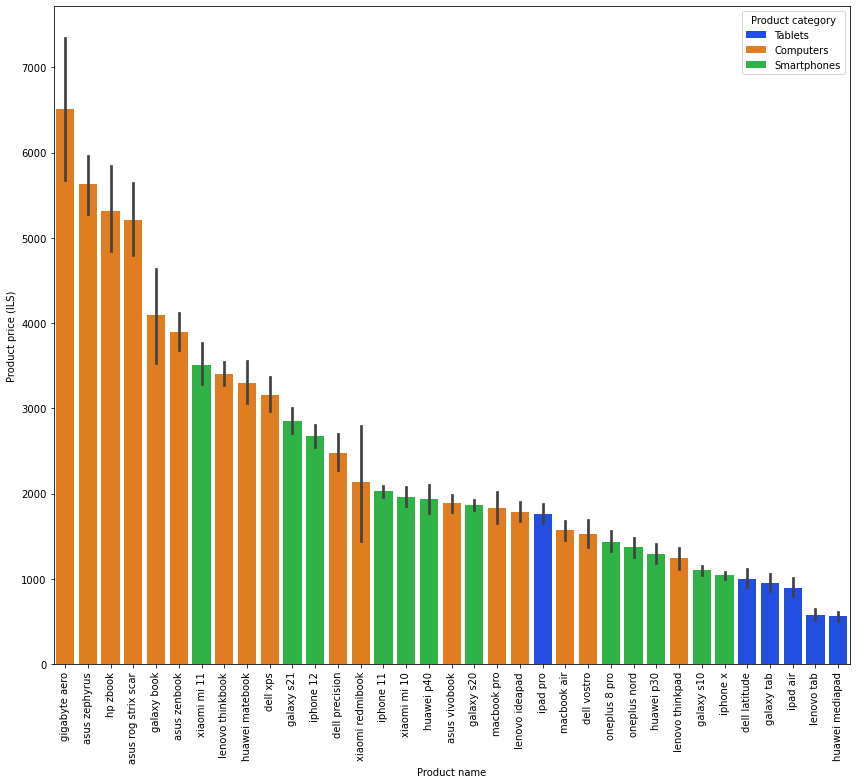

In [51]:
import seaborn as sns

plt.figure(figsize=(12, 11))
sns.barplot(x='product_name', y='product_price', data=df, hue='category', dodge=False, palette='bright', order=order_list2)
plt.xticks(rotation=90)
plt.xlabel('Product name')
plt.ylabel('Product price (ILS)')
plt.legend(title='Product category')
plt.tight_layout()
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.savefig("/Users/royyanovski/Desktop/Data_mining_proj_figs/NameVsPrice.png")
plt.show()

### Shipping country and distance from target location (Israel) vs. Shipping fee

In [52]:
df_country = df[['origin_country', 'product_price']].groupby("origin_country").mean().sort_values(by=['product_price'], ascending=False).reset_index()

In [53]:
df_country_shipping = df[['origin_country', 'shipping_fee']].groupby("origin_country").mean().sort_values(by=['shipping_fee'], ascending=False).reset_index()

In [54]:
distances = [2503, 2851, 7656, 14043, 2251, 9444, 3557, 8918, 2643, 4010, 2846, 4144, 7757, 1390, 3276, 3544, 
             3207, 3279, 2171, 7968, 7135, 8272, 4064, 9164, 1200, 2624, 7536, 1553, 2073, 8801]

In [55]:
df_country_shipping['distances'] = distances

In [56]:
df_country_shipping

,origin_country,shipping_fee,distances
0,Poland,188.373333,2503
1,Germany,184.891602,2851
2,Malaysia,175.495000,7656
3,Australia,165.902308,14043
4,Italy,163.511707,2251
5,United States,160.465508,9444
6,United Kingdom,150.705471,3557
7,Canada,149.913478,8918
8,Russian Federation,143.516000,2643
9,Portugal,142.705000,4010


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


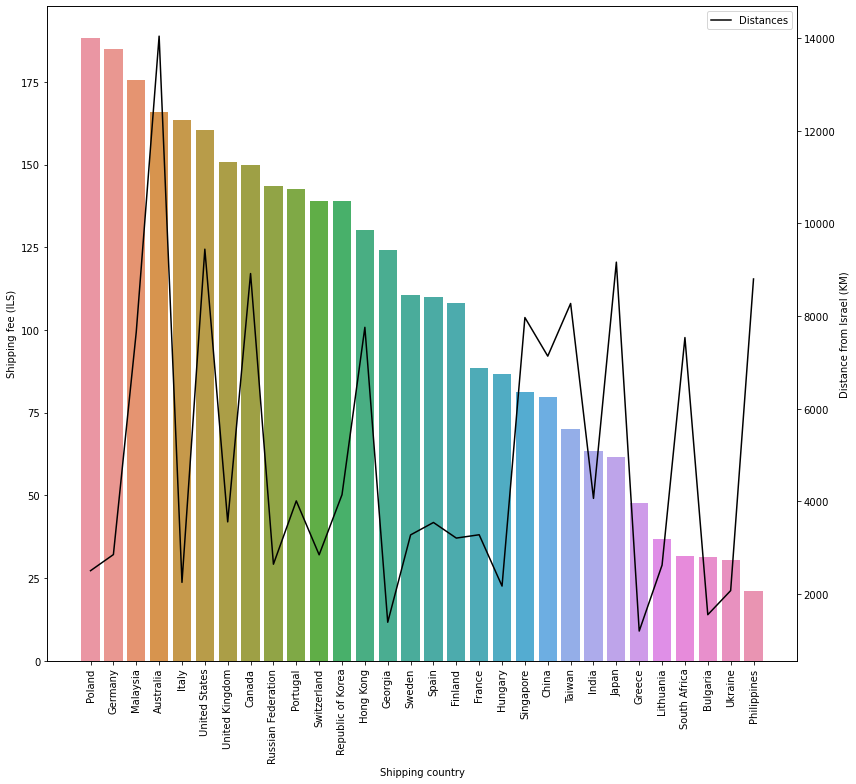

In [57]:
fig, ax1 = plt.subplots(figsize=(12, 11))
sns.barplot(x='origin_country', y='shipping_fee', data=df_country_shipping, ax=ax1)
ax2 = plt.twinx()
sns.lineplot(x='origin_country', y='distances', data=df_country_shipping, ax=ax2, color='black', label='Distances')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_xlabel('Shipping country')
ax1.set_ylabel('Shipping fee (ILS)')
ax2.set_ylabel('Distance from Israel (KM)')
plt.tight_layout()
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.savefig("/Users/royyanovski/Desktop/Data_mining_proj_figs/CountryVsShipping.png")
plt.show()

### Shipping fee vs. Seller feedback score

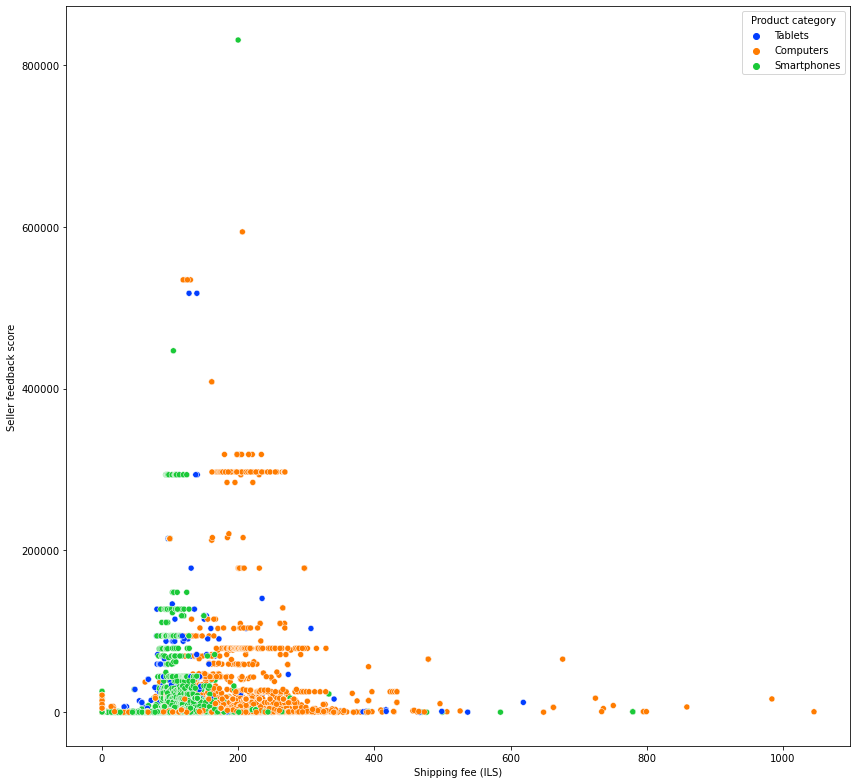

In [58]:
plt.figure(figsize=(12, 11))
sns.scatterplot(x='shipping_fee', y='seller_feedback_score', data=df, hue='category', palette='bright')
plt.xlabel('Shipping fee (ILS)')
plt.ylabel('Seller feedback score')
plt.legend(title='Product category')
plt.tight_layout()
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.savefig("/Users/royyanovski/Desktop/Data_mining_proj_figs/ShippingVsFeedback.png")
plt.show()

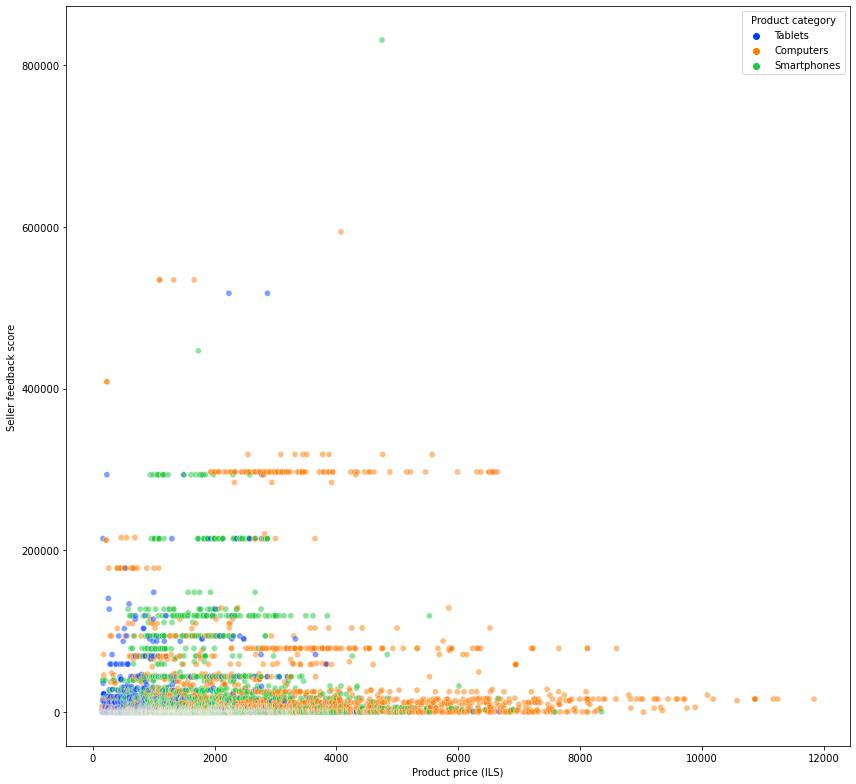

In [59]:
plt.figure(figsize=(12, 11))
sns.scatterplot(x='product_price', y='seller_feedback_score', data=df, hue='category', palette='bright', alpha=0.5)
plt.xlabel('Product price (ILS)')
plt.ylabel('Seller feedback score')
plt.legend(title='Product category')
plt.tight_layout()
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.savefig("/Users/royyanovski/Desktop/Data_mining_proj_figs/PriceVsFeedback.png")
plt.show()

### Product condition vs. price

In [60]:
order_list = ['New','Certified refurbished','Open box', 'Seller refurbished', 'Used', 'For parts or not working']

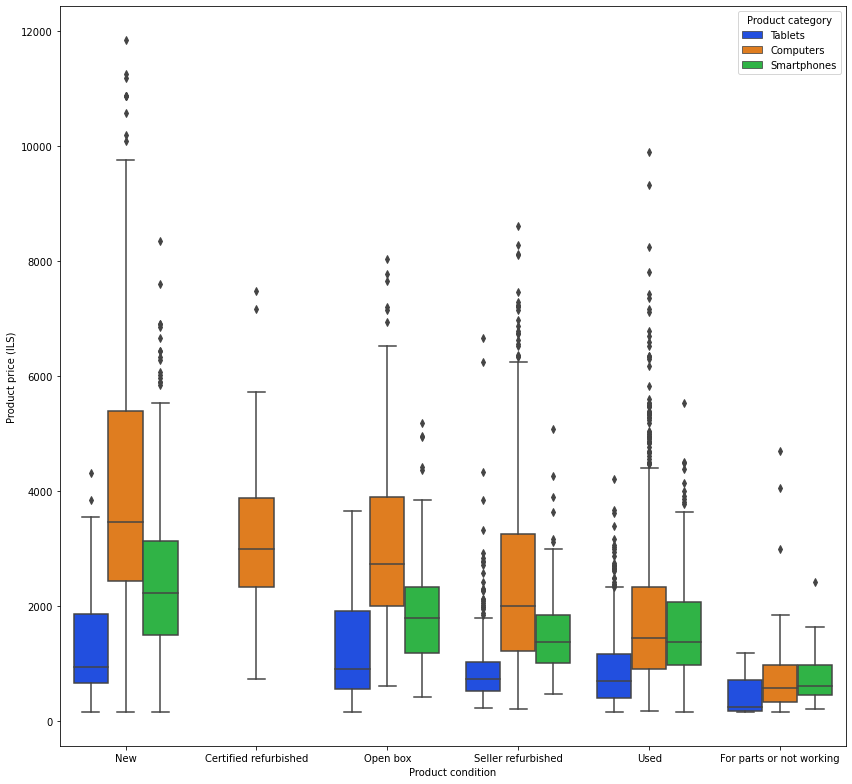

In [61]:
plt.figure(figsize=(12, 11))
sns.boxplot(x='product_condition', y='product_price', data=df, hue='category', palette='bright', order=order_list)
plt.ylabel('Product price (ILS)')
plt.xlabel('Product condition')
plt.legend(title='Product category')
plt.tight_layout()
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.savefig("/Users/royyanovski/Desktop/Data_mining_proj_figs/ConditionVsPrice.png")
plt.show()

### Search page number vs. average product price

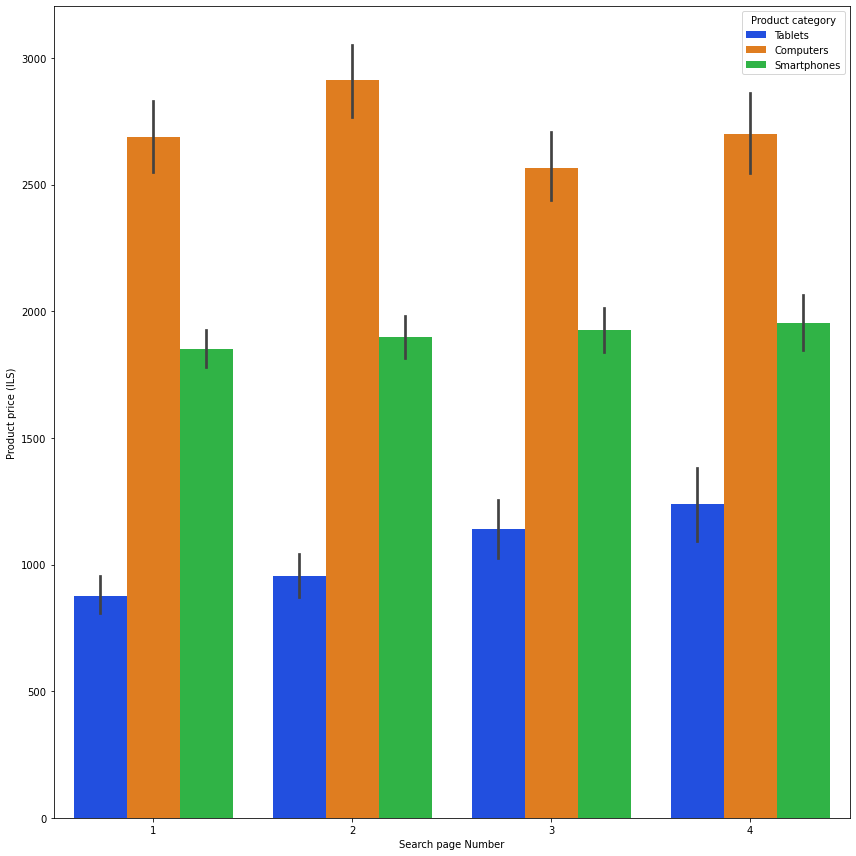

In [62]:
plt.figure(figsize=(12, 12))
sns.barplot(x='page_number', y='product_price', data=df, hue='category', palette='bright')
plt.ylabel('Product price (ILS)')
plt.xlabel('Search page Number')
plt.legend(title='Product category')
plt.tight_layout()
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.savefig("/Users/royyanovski/Desktop/Data_mining_proj_figs/PageVsPrice.png")
plt.show()

## Creating dummy variables for the categorial features

In [63]:
X_train = train_set.drop(['product_price'], axis=1)
y_train = train_set['product_price']

X_test = test_set.drop(['product_price'], axis=1)
y_test = test_set['product_price']

In [64]:
dummies = pd.get_dummies(X_train['category'])
X_train = pd.concat([X_train, dummies], axis=1).drop(['category'], axis=1)
dummies = pd.get_dummies(X_test['category'])
X_test = pd.concat([X_test, dummies], axis=1).drop(['category'], axis=1)

In [65]:
dummies = pd.get_dummies(X_train['product_condition'])
X_train = pd.concat([X_train, dummies], axis=1).drop(['product_condition'], axis=1)
dummies = pd.get_dummies(X_test['product_condition'])
X_test = pd.concat([X_test, dummies], axis=1).drop(['product_condition'], axis=1)

In [66]:
dummies = pd.get_dummies(X_train['product_name'])
X_train = pd.concat([X_train, dummies], axis=1).drop(['product_name'], axis=1)
dummies = pd.get_dummies(X_test['product_name'])
X_test = pd.concat([X_test, dummies], axis=1).drop(['product_name'], axis=1)

In [67]:
dummies = pd.get_dummies(X_train['manufacturer'])
X_train = pd.concat([X_train, dummies], axis=1).drop(['manufacturer'], axis=1)
dummies = pd.get_dummies(X_test['manufacturer'])
X_test = pd.concat([X_test, dummies], axis=1).drop(['manufacturer'], axis=1)

In [68]:
dummies = pd.get_dummies(X_train['origin_country'])
X_train = pd.concat([X_train, dummies], axis=1).drop(['origin_country'], axis=1)
dummies = pd.get_dummies(X_test['origin_country'])
X_test = pd.concat([X_test, dummies], axis=1).drop(['origin_country'], axis=1)

## Binning the 'shipping fee' feature

In [69]:
X_train = X_train.reset_index()
X_train.drop(['index'], axis=1, inplace=True)

In [70]:
X_test = X_test.reset_index()
X_test.drop(['index'], axis=1, inplace=True)

In [71]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

In [72]:
est.fit(X_train[['shipping_fee']])

KBinsDiscretizer(encode='ordinal', n_bins=10)

In [73]:
X_train[['shipping_fee']] = pd.Series(est.transform(X_train[['shipping_fee']])[:, 0])

In [74]:
X_test[['shipping_fee']] = pd.Series(est.transform(X_test[['shipping_fee']])[:, 0])

In [75]:
X_train.shipping_fee.value_counts(dropna=False)

1.0    472
3.0    466
8.0    466
6.0    465
5.0    465
9.0    465
2.0    465
4.0    464
7.0    464
0.0    457
Name: shipping_fee, dtype: int64

## Dropping unique test set columns

In [76]:
for col in X_test.columns:
    if col not in X_train.columns:
        print(col)
        X_test.drop([col], axis=1, inplace=True)

Cambodia
Czech Republic
Latvia


In [77]:
X_train.shape

(4649, 65)

In [78]:
X_test.shape

(1545, 65)

## Baseline

In [79]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = [y_train.mean() for i in range(len(y_train))]
print(f'Our baseline results are: R-square: {r2_score(y_train, y_pred):.3f}, RMSE: {mean_squared_error(y_train, y_pred, squared=False):.2f}')


Our baseline results are: R-square: 0.000, RMSE: 1602.52


## Creating a Random Forest model

In [80]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=0)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f'The R-square on the test set is: {r2:.3f}')

The R-square on the test set is: 0.722


In [81]:
print(f'The R-square on the train set is: {rf_reg.score(X_train, y_train):.3f}')

The R-square on the train set is: 0.882


## Tuning hyper-parameters and creating the improved model

In [82]:
rf_reg = RandomForestRegressor(min_samples_split=12, max_features=30, n_estimators=250, max_depth=30, min_impurity_decrease=0.1, random_state=0)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f'The R-square on the test set is: {r2:.3f}')

The R-square on the test set is: 0.755


In [83]:
print(f'The R-square on the train set is: {rf_reg.score(X_train, y_train):.3f}')

The R-square on the train set is: 0.825


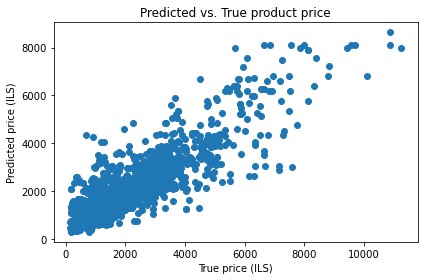

In [86]:
plt.scatter(y_test, y_pred)
plt.title('Predicted vs. True product price')
plt.ylabel('Predicted price (ILS)')
plt.xlabel('True price (ILS)')
plt.tight_layout()
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.savefig("/Users/royyanovski/Desktop/Data_mining_proj_figs/ModelResult.png")
plt.show()

## Checking for feature importances

In [99]:
def topten_feat_importances(imps, names):
    imps, names = zip(*sorted(zip(imps, names)))
    f = plt.figure(figsize=(6, 9))
    plt.barh(range(10), imps[-10:], align='center')
    plt.yticks(range(10), names[-10:])
    plt.xlabel('Feature importance rank by the RF algorithm')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.rcParams['axes.facecolor']='white'
    plt.rcParams['savefig.facecolor']='white'
    plt.savefig("/Users/royyanovski/Desktop/Data_mining_proj_figs/FeatImp.png")
    plt.show()

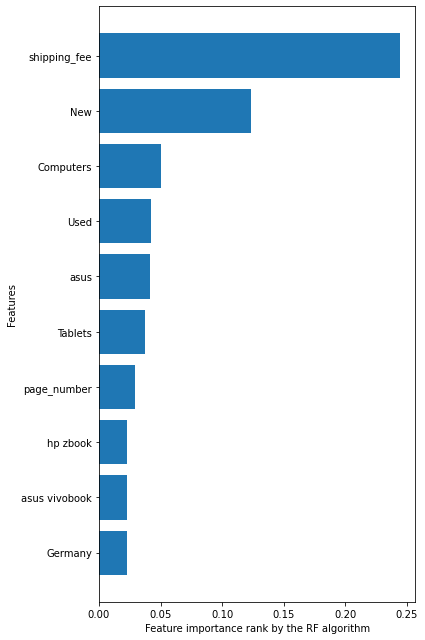

In [100]:
topten_feat_importances(rf_reg.feature_importances_, X_train.columns)